In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.patches import Patch

New users will need to update the y1000plus_tools, y1000plus_dir, figsave_dir, and yeast_esr_exp_dir (if those libraries are being used)
y1000plus data dir is C:\Users\bheineike\Documents\GitHub\y1000plus_tools\
['C:\\Users\\bheineike\\Documents\\GitHub\\y1000plus_tools\\scripts', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\python311.zip', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\DLLs', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\Lib', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics', '', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\Lib\\site-packages', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\Lib\\site-packages\\win32', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\bheineike\\anaconda3\\envs\\bmh_bioinformatics\\Lib\\site-packages\\Pythonwin']
Added C:\Users\bheineike\Documents\GitHub\y1000plus_tools\ to path


Use yeast_esr_expression functions? (Y/n) n


Importing y1000plus_tools.py
y1000plus data dir is unset


In [2]:
y1000_species = pd.read_csv(y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"), index_col=0)

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
#clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
#outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'

#y1000_species_subset = y1000_species[(y1000_species['Major clade'].isin(clades_of_interest))  |  (y1000_species['Species name'].isin(outgroups))]


#outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
#y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])

y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']
#y1000_species_subset = y1000_species


In [4]:
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
target_y1000_id = scer_lookup.loc['YPR062W','y1000_id']

y1000_id_list = [target_y1000_id]
goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

In [5]:
protein_fname_base = 'CLC1'

In [26]:
#protein_fname_base = 'CLC1'
og_genes = og_genes_lookup[goi_og_lookup[target_y1000_id]]
y1000plus_tools.extract_protein_seqs(og_genes, protein_fname_base, y1000_species_subset)
print(protein_fname_base + ' protein sequence extraction complete')

yHMPu5000034897_ogataea_glucozyma_160519
yHMPu5000034674_blastobotrys_muscicola_160519
yHMPu5000035673_candida_orba_160613
yHAB166_kazachstania_yakushimaensis_160519
yHMPu5000035325_cyberlindnera_petersonii_160928
yHMPu5000034623_pichia_norvegensis_160519
yHAB133_kazachstania_unispora_160519
sporopachydermia_quercuum
tortispora_caseinolytica
yHMPu5000035244_candida_incommunis_160928
yHAB147_kazachstania_taianensis_160519
yHMPu5000034893_ogataea_philodendra_160519
candida_orthopsilosis
yHMPu5000035671_phaffomyces_antillensis_160613
yHMPu5000041822_dipodascus_geniculatus_160928
pichia_membranifaciens
yHMPu5000026145_ambrosiozyma_vanderkliftii_160519
yHMPu5000034624_pichia_nakasei_160519
yHMPu5000026142_citeromyces_matritensis_160519
yHMPu5000035040_ambrosiozyma_maleeae_160519
naumovozyma_dairenensis
yHMPu5000034866_zygosaccharomyces_bisporus_160519
lachancea_fantastica
scheffersomyces_stipitis
candida_glabrata
yHMPu5000034749_lipomyces_mesembrius_160519
yHMPu5000034612_saturnispora_saito

In [40]:
#Make alignment for CLC1: 

print( "Go to ubuntu and run the following:")
print("\n")
print( "cd ~/singularity-ce-4.0.1")
print( "export SINGULARITY_BIND='/mnt/g/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold':/home/heineike/alphafold,'/mnt/c/Documents and Settings/bheineike/Documents/GitHub':/home/heineike/github")
print( "singularity shell codeml.sif")

print("\n")

print("Then from within the shell run the following:")
print("\n")

print(". /opt/conda/etc/profile.d/conda.sh")
print("conda activate diverse_yeast_env")



ubuntu_y1000plus_dir = '/home/heineike/github/y1000plus_tools/'

protein_fname_base_full = ubuntu_y1000plus_dir + 'y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base

#Command: 
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base_full + '.fasta', 
                '>',
                protein_fname_base_full + '_aln.fasta']


print(" ".join(mafft_command))


clipkit_cmd = ['clipkit', protein_fname_base_full + '_aln.fasta', '-l']

print(" ".join(clipkit_cmd))

# Run iQtree on trimmed peptide MSA  
# Should I run with a pombe outgroup? 

# print('Building Protein Tree')

iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base_full + '_aln.fasta.clipkit',
                  #"-m", 'LG+I+G4',  #'MF', #only runs model finder 
                  "-nt", "AUTO",  #automatically determines number of threads but 7 was performing well
                  "-bb", "1000",
                  "-alrt", "1000",
                  #"-o", 'Spom_AF-Q10208-F1-model_v2'  #Outgroup for rooting should be pombe  for now using default. 
                 ]
print(" ".join(iqtree_command))

# subprocess.run(iqtree_command)


Go to ubuntu and run the following:


cd ~/singularity-ce-4.0.1
export SINGULARITY_BIND='/mnt/g/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold':/home/heineike/alphafold,'/mnt/c/Documents and Settings/bheineike/Documents/GitHub':/home/heineike/github
singularity shell codeml.sif


Then from within the shell run the following:


. /opt/conda/etc/profile.d/conda.sh
conda activate diverse_yeast_env
mafft --genafpair --maxiterate 1000 /home/heineike/github/y1000plus_tools/y1000plus_tools_data/y1000plus/proteins_og/CLC1/CLC1.fasta > /home/heineike/github/y1000plus_tools/y1000plus_tools_data/y1000plus/proteins_og/CLC1/CLC1_aln.fasta
clipkit /home/heineike/github/y1000plus_tools/y1000plus_tools_data/y1000plus/proteins_og/CLC1/CLC1_aln.fasta -l
iqtree -s /home/heineike/github/y1000plus_tools/y1000plus_tools_data/y1000plus/proteins_og/CLC1/CLC1_aln.fasta.clipkit -nt AUTO -bb 1000 -alrt 1000


In [ ]:
C:\Users\bheineike\Documents\GitHub\y1000plus_tools\y1000plus_tools_data\y1000plus\proteins_og\CLC1

In [28]:
tree_fname

'C:\\Users\\bheineike\\Documents\\GitHub\\y1000plus_tools\\y1000plus_tools_data\\y1000plus\\proteins_og\\CLC1\\CLC1.fasta.clipkit.treefile'

In [13]:
#Visualize Tree

#tree_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/shen_2018_data/data_in_Figure2/332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick')
tree_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base + '_aln.fasta.clipkit.treefile')


t = Tree(tree_fname, format=1)

#t.prune(time_tree_names)

#clade_color_lookup = y1000plus_tools.y1000_clade_color_lookup(y1000_species_fname =y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"))
clade_lookup = dict(zip(y1000_species_subset['original_genome_id'], y1000_species_subset['Major clade']))  #dict(zip(species_set_exp['Time_tree_name'], species_set_exp['Major clade']))
tab20_cmap = cm.tab20

#get_clade_order
clade_order = []
for jj, node in enumerate(t.get_leaves()):
    name=node.name
    
    first_two_test = '_'.join(name.split('_')[0:2])
    if first_two_test in {'candida_albicans', 'saccharomyces_cerevisiae'}:
        spec_name = first_two_test
    else:     
        spec_name = node.name.split('Seq')[0].strip('_')
    clade = clade_lookup[spec_name]
    if not(clade in clade_order):
        clade_order.append(clade)

#clade_color_lookup = {clade:colors.to_hex(tab20_cmap(11-jj)) for (jj,clade) in enumerate(clade_order)}

clade_order_curated = clade_order.copy()
#clade_order_curated.remove('Saccharomycetaceae')
#clade_order_curated = ['Outgroup'] + clade_order_curated + ['Saccharomycetaceae, KLE', 'Saccharomycetaceae, ZT', 'Saccharomycetaceae, post WGH']



clade_color_lookup = {'Outgroup': colors.to_hex(tab20_cmap(15)), 
                      'Lipomycetaceae': colors.to_hex(tab20_cmap(14)),
                      'Trigonopsidaceae': colors.to_hex(tab20_cmap(11)),
                      'Dipodascaceae/Trichomonascaceae': colors.to_hex(tab20_cmap(10)),
                      'Alloascoideaceae': colors.to_hex(tab20_cmap(13)),
                      'Sporopachydermia clade': colors.to_hex(tab20_cmap(12)),
                      'CUG-Ala': colors.to_hex(tab20_cmap(3)),
                      'Pichiaceae': colors.to_hex(tab20_cmap(2)),
                      'CUG-Ser1': colors.to_hex(tab20_cmap(7)),
                      'CUG-Ser2': colors.to_hex(tab20_cmap(19)),
                      'Phaffomycetaceae': colors.to_hex(tab20_cmap(18)),
                      'Saccharomycodaceae': colors.to_hex(tab20_cmap(8)),
                      #'Saccharomycetaceae, KLE': colors.to_hex(tab20_cmap(9)),
                      #'Saccharomycetaceae, ZT': colors.to_hex(tab20_cmap(5)),
                      #'Saccharomycetaceae, post WGH': colors.to_hex(tab20_cmap(17))
                      'Saccharomycetaceae': colors.to_hex(tab20_cmap(17))
                     }



t.ladderize()

# #write file without S. pombe to a newick tree 
# outfile=base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/species_selection/species_selection.nw')
# t.write(outfile)
# t_text = t.write()

# #Add pombe to the tree: 
# t_pombe_text = '(Schizosaccharomyces_pombe:' + str(pombe_branch_len) + ',' + t_text.split(';')[0] + ');'
# t_pombe = y1000plus_tools.Tree(t_pombe_text)
# outfile_pombe=base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/species_selection/species_selection_pombe.nw')
# t_pombe.write(outfile_pombe)

for node in t.get_leaves():
    name = node.name
    #group, abbrev = leaves_to_view[name]
    nstyle = NodeStyle()
    
                       
                            
                            
#     if name=='Schizosaccharomyces_pombe': 
#         clade = 'Outgroup'
        
#         #make red dashes for node line
#         nstyle["hz_line_color"] = "#ff0000"
#         nstyle["hz_line_type"] = 1
#         nstyle["hz_line_width"] = 2.4
        
    #else: 
    
    first_two_test = '_'.join(name.split('_')[0:2])
    if first_two_test in {'candida_albicans', 'saccharomyces_cerevisiae'}:
        spec_name = first_two_test
    else:     
        spec_name = node.name.split('Seq')[0].strip('_')
    clade = clade_lookup[spec_name]
    # if clade=='Saccharomycetaceae':
    #     if name in ['Kluyveromyces_lactis','Kluyveromyces_marxianus', 'Lachancea_thermotolerans','Eremothecium_gossypii']: 
    #         clade = 'Saccharomycetaceae, KLE'
    #     elif name in ['Zygosaccharomyces_rouxii','Torulaspora_delbrueckii']:
    #         clade = 'Saccharomycetaceae, ZT'
    #     elif name in ['Saccharomyces_cerevisiae','Kazachstania_naganishii', 'Vanderwaltozyma_polyspora']: 
    #         clade = 'Saccharomycetaceae, post WGH'
    #node_color = clade_color_lookup[clade]   shen et al node colors - too bright
    node_color = clade_color_lookup[clade]
    nstyle['bgcolor']= node_color
    
    
    node.set_style(nstyle)
    
    # node_label_face = TextFace(' ' + spec_abbrev_lookup[name]) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    # node.add_face(node_label_face, column=1, position = "branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
    
fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base + '_tree_image_nolabel.svg')
t.render(fname, tree_style=ts)
#t.render('%%inline', tree_style=ts)





{'nodes': [[0.5, 11.054038346836023, 4.5, 15.054038346836023, 0, None],
  [8.319652977252975, 0.5, 12.319652977252975, 4.5, 1, None],
  [7.57051120237459, 5.0, 11.57051120237459, 9.0, 2, None],
  [17.71422287360297, 3.5, 21.71422287360297, 7.5, 3, None],
  [10.570662430460573, 6.5, 14.570662430460573, 10.5, 4, None],
  [7.295870111912463,
   21.608076693672047,
   11.295870111912464,
   25.608076693672047,
   5,
   None],
  [18.866799703786093, 9.5, 22.866799703786093, 13.5, 6, None],
  [13.601731587546533,
   33.71615338734409,
   17.60173158754653,
   37.71615338734409,
   7,
   None],
  [20.262802621259468, 15.875, 24.262802621259468, 19.875, 8, None],
  [29.1680071526573, 12.5, 33.168007152657296, 16.5, 9, None],
  [24.894263071584117, 19.25, 28.894263071584117, 23.25, 10, None],
  [45.35298579072384, 15.5, 49.35298579072384, 19.5, 11, None],
  [32.76039561300931, 23.0, 36.76039561300931, 27.0, 12, None],
  [44.59663978461706, 20.0, 48.59663978461706, 24.0, 13, None],
  [48.1801768

In [12]:
#Visualize Tree with node names

#tree_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/shen_2018_data/data_in_Figure2/332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick')
tree_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base + '_aln.fasta.clipkit.treefile')


t = Tree(tree_fname, format=1)

#t.prune(time_tree_names)

#clade_color_lookup = y1000plus_tools.y1000_clade_color_lookup(y1000_species_fname =y1000plus_dir + os.path.normpath("y1000plus_tools_data/y1000plus/y1000_species_table.csv"))
clade_lookup = dict(zip(y1000_species_subset['original_genome_id'], y1000_species_subset['Major clade']))  #dict(zip(species_set_exp['Time_tree_name'], species_set_exp['Major clade']))
tab20_cmap = cm.tab20

#get_clade_order
clade_order = []
for jj, node in enumerate(t.get_leaves()):
    name=node.name
    
    first_two_test = '_'.join(name.split('_')[0:2])
    if first_two_test in {'candida_albicans', 'saccharomyces_cerevisiae'}:
        spec_name = first_two_test
    else:     
        spec_name = node.name.split('Seq')[0].strip('_')
    clade = clade_lookup[spec_name]
    if not(clade in clade_order):
        clade_order.append(clade)

#clade_color_lookup = {clade:colors.to_hex(tab20_cmap(11-jj)) for (jj,clade) in enumerate(clade_order)}

clade_order_curated = clade_order.copy()
#clade_order_curated.remove('Saccharomycetaceae')
#clade_order_curated = ['Outgroup'] + clade_order_curated + ['Saccharomycetaceae, KLE', 'Saccharomycetaceae, ZT', 'Saccharomycetaceae, post WGH']



clade_color_lookup = {'Outgroup': colors.to_hex(tab20_cmap(15)), 
                      'Lipomycetaceae': colors.to_hex(tab20_cmap(14)),
                      'Trigonopsidaceae': colors.to_hex(tab20_cmap(11)),
                      'Dipodascaceae/Trichomonascaceae': colors.to_hex(tab20_cmap(10)),
                      'Alloascoideaceae': colors.to_hex(tab20_cmap(13)),
                      'Sporopachydermia clade': colors.to_hex(tab20_cmap(12)),
                      'CUG-Ala': colors.to_hex(tab20_cmap(3)),
                      'Pichiaceae': colors.to_hex(tab20_cmap(2)),
                      'CUG-Ser1': colors.to_hex(tab20_cmap(7)),
                      'CUG-Ser2': colors.to_hex(tab20_cmap(19)),
                      'Phaffomycetaceae': colors.to_hex(tab20_cmap(18)),
                      'Saccharomycodaceae': colors.to_hex(tab20_cmap(8)),
                      #'Saccharomycetaceae, KLE': colors.to_hex(tab20_cmap(9)),
                      #'Saccharomycetaceae, ZT': colors.to_hex(tab20_cmap(5)),
                      #'Saccharomycetaceae, post WGH': colors.to_hex(tab20_cmap(17))
                      'Saccharomycetaceae': colors.to_hex(tab20_cmap(17))
                     }



t.ladderize()

# #write file without S. pombe to a newick tree 
# outfile=base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/species_selection/species_selection.nw')
# t.write(outfile)
# t_text = t.write()

# #Add pombe to the tree: 
# t_pombe_text = '(Schizosaccharomyces_pombe:' + str(pombe_branch_len) + ',' + t_text.split(';')[0] + ');'
# t_pombe = y1000plus_tools.Tree(t_pombe_text)
# outfile_pombe=base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/species_selection/species_selection_pombe.nw')
# t_pombe.write(outfile_pombe)

for node in t.get_leaves():
    name = node.name
    #group, abbrev = leaves_to_view[name]
    nstyle = NodeStyle()
    
                       
                            
                            
#     if name=='Schizosaccharomyces_pombe': 
#         clade = 'Outgroup'
        
#         #make red dashes for node line
#         nstyle["hz_line_color"] = "#ff0000"
#         nstyle["hz_line_type"] = 1
#         nstyle["hz_line_width"] = 2.4
        
    #else: 
    
    first_two_test = '_'.join(name.split('_')[0:2])
    if first_two_test in {'candida_albicans', 'saccharomyces_cerevisiae'}:
        spec_name = first_two_test
    else:     
        spec_name = node.name.split('Seq')[0].strip('_')
    clade = clade_lookup[spec_name]
    # if clade=='Saccharomycetaceae':
    #     if name in ['Kluyveromyces_lactis','Kluyveromyces_marxianus', 'Lachancea_thermotolerans','Eremothecium_gossypii']: 
    #         clade = 'Saccharomycetaceae, KLE'
    #     elif name in ['Zygosaccharomyces_rouxii','Torulaspora_delbrueckii']:
    #         clade = 'Saccharomycetaceae, ZT'
    #     elif name in ['Saccharomyces_cerevisiae','Kazachstania_naganishii', 'Vanderwaltozyma_polyspora']: 
    #         clade = 'Saccharomycetaceae, post WGH'
    #node_color = clade_color_lookup[clade]   shen et al node colors - too bright
    node_color = clade_color_lookup[clade]
    nstyle['bgcolor']= node_color
    
    
    node.set_style(nstyle)
    
    # node_label_face = TextFace(' ' + spec_abbrev_lookup[name]) # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    # node.add_face(node_label_face, column=1, position = "branch-right")

ts = TreeStyle()
ts.show_leaf_name = True
    
fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base + '_tree_image.svg')
t.render(fname, tree_style=ts)
#t.render('%%inline', tree_style=ts)



{'nodes': [[0.5, 75.34224286329481, 4.5, 79.34224286329481, 0, None],
  [8.319652977252986, 8.5, 12.319652977252986, 12.5, 1, None],
  [7.57051120237459, 37.0, 11.57051120237459, 41.0, 2, None],
  [17.714222873602992, 27.5, 21.714222873602992, 31.5, 3, None],
  [10.570662430460587, 46.5, 14.570662430460587, 50.5, 4, None],
  [7.295870111912463,
   142.18448572658963,
   11.295870111912464,
   146.18448572658963,
   5,
   None],
  [18.86679970378607, 65.5, 22.86679970378607, 69.5, 6, None],
  [13.601731587546533,
   218.86897145317926,
   17.60173158754653,
   222.86897145317926,
   7,
   None],
  [20.262802621259468, 105.875, 24.262802621259468, 109.875, 8, None],
  [29.168007152657296, 84.5, 33.168007152657296, 88.5, 9, None],
  [24.894263071584117, 127.25, 28.894263071584117, 131.25, 10, None],
  [45.35298579072382, 103.5, 49.35298579072382, 107.5, 11, None],
  [32.76039561300931, 151.0, 36.76039561300931, 155.0, 12, None],
  [44.59663978461706, 132.0, 48.59663978461706, 136.0, 13, N

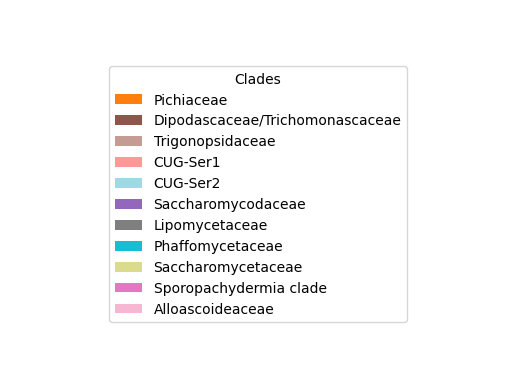

In [9]:
fig,ax = plt.subplots()
legend_elements = [Patch(facecolor=clade_color_lookup[clade], label=clade) for clade in clade_order_curated] 
ax.legend(handles=legend_elements, loc='center', title='Clades')
ax.set_axis_off()
fig.savefig(y1000plus_dir + os.sep + os.path.normpath('y1000plus_tools_data\y1000plus\proteins_og\CLC1_tree.svg'))

In [51]:
# delete_control = []
for id, row in y1000_species_subset.iterrows():
    a = row
#     #pick out condition name
#     #pick out mutant name
#     #delete_control_value = use condition name to get value of fitness for that mutant
#     delete_control.append(delete_control_value)
    
# dataframe['new_column_label'] = delete_control

In [40]:
a = []
a.append(1)
a.append(79)
a

[1, 79]

In [6]:
#How many structures have paralogs
goi_fasta_fname = y1000plus_dir + os.path.normpath('y1000plus_tools_data/y1000plus/proteins_og/' + protein_fname_base + '/' + protein_fname_base + '.fasta')

ortholog_list = []
spec_list = []
for record in SeqIO.parse(goi_fasta_fname, 'fasta'): 
    ortholog_id = record.id
    ortholog_list.append(ortholog_id)
    spec_list.append(ortholog_id.split('Seq')[0].strip('_'))

print("There are {} orthologs of {} in the Shen et al Orthogroups".format(len(ortholog_list), protein_fname_base))

specs_w_paralogs = [item for item, count in Counter(spec_list).items() if count>1]

print("only {} have possible paralogs.  They were all just duplicates".format(len(specs_w_paralogs)))

print(specs_w_paralogs)


There are 277 orthologs of CLC1 in the Shen et al Orthogroups
only 3 have possible paralogs.  They were all just duplicates
['yHMPu5000035686_cyberlindnera_saturnus_160519', 'yHMPu5000034881_torulaspora_pretoriensis_160519', 'yHMPu5000034990_candida_corydali_160519']


In [18]:
specs_w_paralogs = [item for item, count in Counter(spec_list).items() if count>1]

In [16]:
(set(list(y1000_species_subset['original_genome_id'])) - set(spec_list))

{'babjeviella_inositovora',
 'candida_albicans',
 'candida_auris',
 'candida_carpophila',
 'candida_sorboxylosa',
 'candida_succiphila',
 'candida_tenuis',
 'debaryomyces_hansenii',
 'eremothecium_coryli',
 'eremothecium_cymbalariae',
 'eremothecium_sinecaudum',
 'hanseniaspora_uvarum',
 'kuraishia_capsulata',
 'metschnikowia_aberdeeniae',
 'metschnikowia_bicuspidata',
 'metschnikowia_bowlesiae',
 'metschnikowia_dekortum',
 'metschnikowia_drakensbergensis',
 'metschnikowia_hibisci',
 'metschnikowia_kipukae',
 'metschnikowia_proteae',
 'metschnikowia_shivogae',
 'metschnikowia_similis',
 'millerozyma_acaciae',
 'nakazawaea_peltata',
 'pachysolen_tannophilus',
 'priceomyces_haplophilus',
 'saccharomyces_cerevisiae',
 'spathaspora_arborariae',
 'wickerhamia_fluorescens',
 'wickerhamiella_domercqiae',
 'yHMPu5000034627_pichia_heedii_160519',
 'yHMPu5000034632_candida_athensensis_160519',
 'yHMPu5000034883_peterozyma_xylosa_160519',
 'yHMPu5000034884_peterozyma_toletana_160519',
 'yHMPu5000

In [9]:
len(spec_list)

277

In [ ]:
#Make structural alignment for CLC1

#Extract species that are present in NCBI

#Extract structures from Alphafold DB

#Make structural alignment

In [22]:
a = np.array([-1,2,3,4,5,-6,7])
abs(a)
#( (a<5) & (a>2) )

array([1, 2, 3, 4, 5, 6, 7])